In [32]:
import keras

In [33]:
import tensorflow as tf

In [34]:
import matplotlib.pyplot as plt

In [35]:
print(keras.__version__)

2.12.0


In [36]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [63]:
number_classes = 9
input_shape = (144, 144, 1) # images should be 144x144 and gray color format

In [71]:
def inspectDatabase(curDatabase):
    print(f"The cardinality of the database is {curDatabase.cardinality()}")
    
    class_names = curDatabase.class_names
    print(f"The database contains {len(class_names)} categories, and they are: {class_names}")
    
    plt.figure(figsize=(10, 10))
    for images, labels in curDatabase.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
            if i == 0:
                print(images[i])

In [90]:
#data_path = "G:\\My Drive\\University classes\\CSE 455\\12-07_project\\small_dataset_for_training\\"
data_path = "G:\\My Drive\\University classes\\CSE 455\\12-07_project\\combined_data\\"

training_data, validation_data = keras.utils.image_dataset_from_directory(
    data_path,
    color_mode = "grayscale",
    image_size = (input_shape[0], input_shape[1]),
    validation_split = 0.1,
    subset = "both",
    seed = 44,
)

Found 9248 files belonging to 9 classes.
Using 8324 files for training.
Using 924 files for validation.


The cardinality of the database is 261
The database contains 9 categories, and they are: ['Automatic Rifle', 'Bazooka', 'Grenade Launcher', 'Handgun', 'Knife', 'SMG', 'Shotgun', 'Sniper', 'Sword']
tf.Tensor(
[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]], shape=(144, 144, 1), dtype=float32)


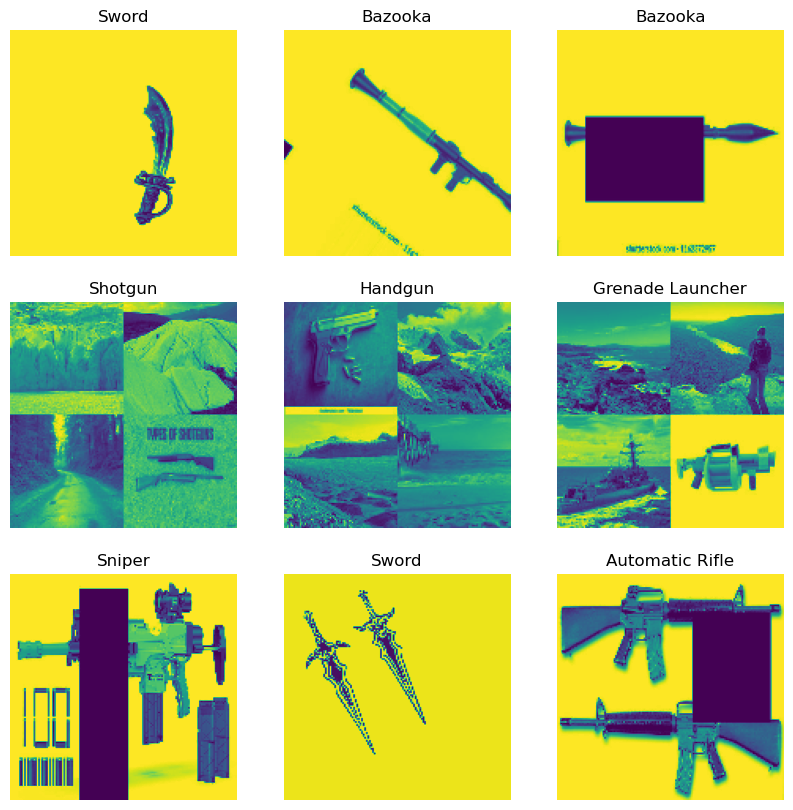

In [91]:
inspectDatabase(training_data)

The cardinality of the database is 29
The database contains 9 categories, and they are: ['Automatic Rifle', 'Bazooka', 'Grenade Launcher', 'Handgun', 'Knife', 'SMG', 'Shotgun', 'Sniper', 'Sword']
tf.Tensor(
[[[ 78.      ]
  [ 78.      ]
  [ 78.      ]
  ...
  [ 67.944336]
  [ 66.      ]
  [ 68.      ]]

 [[ 78.      ]
  [ 78.      ]
  [ 78.      ]
  ...
  [ 67.944336]
  [ 67.      ]
  [ 65.38867 ]]

 [[ 78.      ]
  [ 78.      ]
  [ 78.      ]
  ...
  [ 66.944336]
  [ 68.      ]
  [ 67.      ]]

 ...

 [[ 57.33355 ]
  [ 72.49072 ]
  [107.      ]
  ...
  [ 78.      ]
  [ 78.      ]
  [ 78.      ]]

 [[113.15812 ]
  [ 73.52791 ]
  [ 81.16635 ]
  ...
  [ 78.      ]
  [ 78.      ]
  [ 78.      ]]

 [[ 65.720276]
  [106.61133 ]
  [ 84.61133 ]
  ...
  [ 78.      ]
  [ 78.      ]
  [ 78.      ]]], shape=(144, 144, 1), dtype=float32)


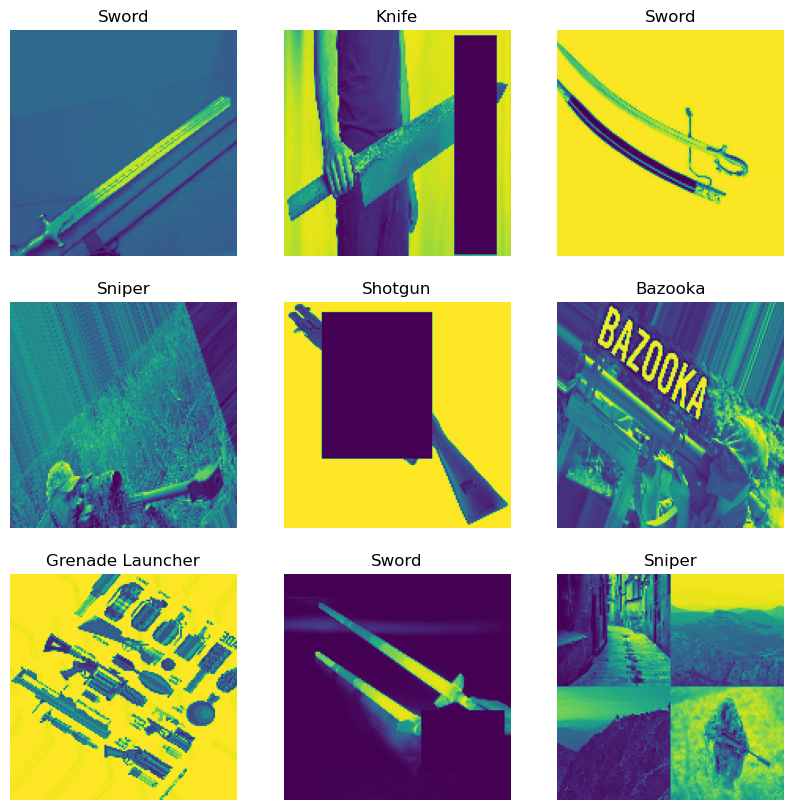

In [92]:
inspectDatabase(validation_data)

In [93]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape, name = "Input"),
        # rescale image because even grayscale values are in 0-255 range
        keras.layers.Rescaling(scale = 1./255),
        keras.layers.Conv2D(32, (3, 3), 1, padding = "same", activation = "relu", name = "Convolution_1"),
        keras.layers.Conv2D(32, (3, 3), 1, padding = "valid", activation = "relu", name = "Convolution_2"),
        keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid", name = "Max_Pooling_1"),
        keras.layers.Dropout(0.25, name = "Dropout_1"),
        keras.layers.Conv2D(64, (3, 3), 1, padding = "same", activation = "relu", name = "Convolution_3"),
        keras.layers.Conv2D(64, (3, 3), 1, padding = "valid", activation = "relu", name = "Convolution_4"),
        keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid", name = "Max_Pooling_2"),
        keras.layers.Dropout(0.25, name = "Dropout_2"),
        keras.layers.Conv2D(128, (3, 3), 1, padding = "same", activation = "relu", name = "Convolution_5"),
        keras.layers.Conv2D(128, (3, 3), 1, padding = "valid", activation = "relu", name = "Convolution_6"),
        keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid", name = "Max_Pooling_3"),
        keras.layers.Dropout(0.25, name = "Dropout_3"),
        keras.layers.Conv2D(32, (3, 3), 1, padding = "same", activation = "relu", name = "Convolution_7"),
        keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = "valid", name = "Max_Pooling_4"),
        keras.layers.Dropout(0.25, name = "Dropout_4"),
        keras.layers.Flatten(name = "Flatten"),
        keras.layers.Dense(number_classes, activation = "softmax", name = "Classification")
    ]
)

In [42]:
model.summary()
#keras.utils.plot_model(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 144, 144, 1)       0         
                                                                 
 Convolution_1 (Conv2D)      (None, 144, 144, 32)      320       
                                                                 
 Convolution_2 (Conv2D)      (None, 142, 142, 32)      9248      
                                                                 
 Max_Pooling_1 (MaxPooling2D  (None, 71, 71, 32)       0         
 )                                                               
                                                                 
 Dropout_1 (Dropout)         (None, 71, 71, 32)        0         
                                                                 
 Convolution_3 (Conv2D)      (None, 71, 71, 64)        18496     
                                                      

In [94]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["sparse_categorical_accuracy"],
)

In [95]:
history = model.fit(
    training_data,
    validation_data = validation_data,
    verbose = 2,
    epochs = 5,
)

Epoch 1/5
261/261 - 347s - loss: 2.1949 - sparse_categorical_accuracy: 0.1219 - val_loss: 2.1952 - val_sparse_categorical_accuracy: 0.1245 - 347s/epoch - 1s/step
Epoch 2/5
261/261 - 414s - loss: 2.1933 - sparse_categorical_accuracy: 0.1157 - val_loss: 2.1949 - val_sparse_categorical_accuracy: 0.1245 - 414s/epoch - 2s/step
Epoch 3/5
261/261 - 413s - loss: 2.1926 - sparse_categorical_accuracy: 0.1167 - val_loss: 2.1958 - val_sparse_categorical_accuracy: 0.1245 - 413s/epoch - 2s/step
Epoch 4/5
261/261 - 440s - loss: 2.1926 - sparse_categorical_accuracy: 0.1170 - val_loss: 2.1955 - val_sparse_categorical_accuracy: 0.1245 - 440s/epoch - 2s/step
Epoch 5/5
261/261 - 460s - loss: 2.1924 - sparse_categorical_accuracy: 0.1204 - val_loss: 2.1957 - val_sparse_categorical_accuracy: 0.1245 - 460s/epoch - 2s/step


In [15]:
print(history)

In [96]:
# Test the evaluation function

evaluation_results_validation = model.evaluate(
    validation_data,
    verbose = 2,
)

29/29 - 8s - loss: 2.1957 - sparse_categorical_accuracy: 0.1245 - 8s/epoch - 282ms/step


In [97]:
evaluation_data_path = "G:\\My Drive\\University classes\\CSE 455\\12-07_project\\12-16_validation2_jpeg\\"

evaluation_data = keras.utils.image_dataset_from_directory(
    evaluation_data_path,
    color_mode = "grayscale",
    image_size = (input_shape[0], input_shape[1]),
)   

Found 91 files belonging to 9 classes.


The cardinality of the database is 3
The database contains 9 categories, and they are: ['Automatic Rifle', 'Bazooka', 'Grenade Launcher', 'Handgun', 'Knife', 'SMG', 'Shotgun', 'Sniper', 'Sword']
tf.Tensor(
[[[ 89.      ]
  [ 88.6875  ]
  [ 89.      ]
  ...
  [218.      ]
  [221.125   ]
  [225.29167 ]]

 [[ 89.1875  ]
  [ 89.      ]
  [ 85.625   ]
  ...
  [218.      ]
  [224.875   ]
  [218.      ]]

 [[ 89.      ]
  [ 91.604164]
  [ 80.      ]
  ...
  [218.      ]
  [218.      ]
  [214.66666 ]]

 ...

 [[167.85423 ]
  [150.12503 ]
  [155.12509 ]
  ...
  [140.      ]
  [136.      ]
  [136.41667 ]]

 [[166.375   ]
  [144.9375  ]
  [157.875   ]
  ...
  [132.6875  ]
  [135.1875  ]
  [140.      ]]

 [[147.62498 ]
  [132.25009 ]
  [147.      ]
  ...
  [141.16681 ]
  [141.16681 ]
  [147.      ]]], shape=(144, 144, 1), dtype=float32)


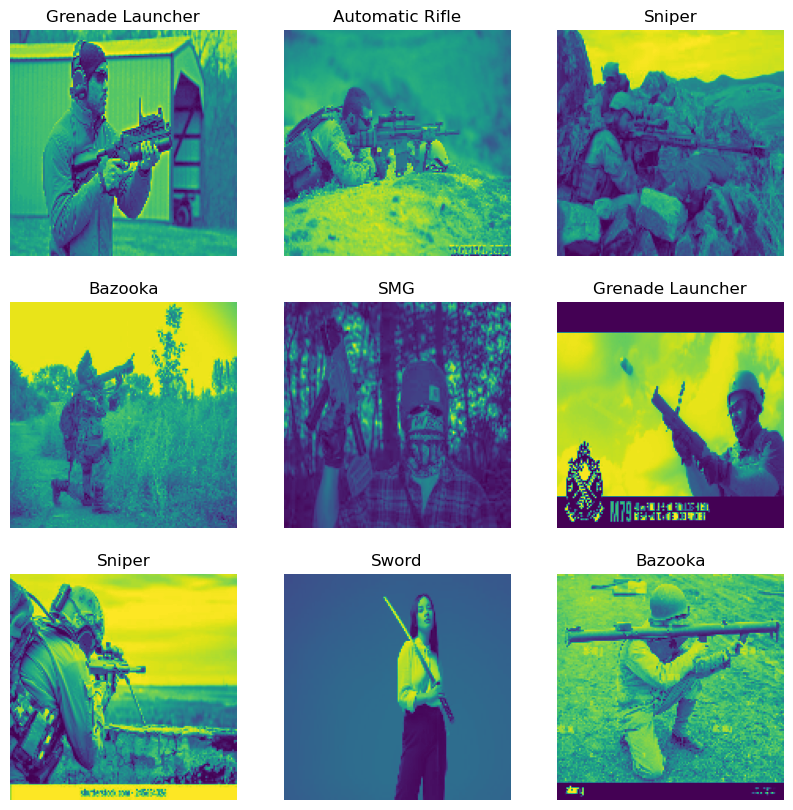

In [98]:
inspectDatabase(evaluation_data)

In [99]:
evaluation_results = model.evaluate(
    evaluation_data,
    verbose = 2,
)

3/3 - 1s - loss: 2.2024 - sparse_categorical_accuracy: 0.1099 - 983ms/epoch - 328ms/step
